In [217]:
#import packages
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [218]:
#read data from data ingestor script
df = pd.read_csv('transactions.csv')

df.head()

,country,customer_id,invoice,year,month,day,stream_id,times_viewed,price,date,year-month
0,United Kingdom,15581.0,493463,2018,1,1,20895,1,2.95,2018-01-01,2018-01
1,United Kingdom,15581.0,493463,2018,1,1,20866,1,1.25,2018-01-01,2018-01
2,United Kingdom,15581.0,493463,2018,1,1,85198,12,0.85,2018-01-01,2018-01
3,United Kingdom,15581.0,493463,2018,1,1,20897,1,2.95,2018-01-01,2018-01
4,United Kingdom,15581.0,493463,2018,1,1,20898,1,2.95,2018-01-01,2018-01


In [ ]:
'''
PRE PROCESSING
look at initial data types DONE
fix any data types DONE? (streamid - might need to go back to data ingestion script and remove letters)
clean up Unnamed column DONE
transform dmy columns into 1 DONE
index on country DONE
index on date DONE
index on year-month DONE
save as new df/csv DONE

sum up total revenue for each country DONE
sort, identify top 10 DONE
cut out data for top 10 countries DONE
save as new df/csv

DATA VIZZES
total revenue for each country DONE
descriptive stats
distributions of each variable
visualise price over time

counts per country of:
- unique customer ids?
- invoices?
- unique stream ids?

'''

In [118]:
#initial dtypes
df.dtypes

country                 object
customer_id            float64
invoice                 object
year                     int64
month                    int64
day                      int64
stream_id               object
times_viewed             int64
price                  float64
date            datetime64[ns]
year-month              object
dtype: object

In [120]:
#make country and stream id categorical
'''
#invoice as well???
'''

df[['country','stream_id']] = df[['country', 'stream_id']].astype('category')

In [121]:
df.dtypes

country               category
customer_id            float64
invoice                 object
year                     int64
month                    int64
day                      int64
stream_id             category
times_viewed             int64
price                  float64
date            datetime64[ns]
year-month              object
dtype: object

In [2]:
#drop 'unnamed' column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
#create date column
#day, month and years to be concatenated into one value to be stored in this column
df['date'] = np.NaN
df['date'] = df['year'].astype(str) + df['month'].astype(str).str.zfill(2) + df['day'].astype(str).str.zfill(2)
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [91]:
#create year-month column
#to allow aggregation of price per month
df['year-month'] = np.NaN
df['year-month'] = df['year'].astype(str) + df['month'].astype(str).str.zfill(2)
df['year-month'] = pd.to_datetime(df['year-month'], format='%Y%m').dt.strftime('%Y-%m')

In [192]:
#group by date, year, month, aggregation = sum
dfdate = df.groupby(by=['date','country']).sum()
dfyear = df.groupby(by=['year']).sum()
dfmonth = df.groupby(by=['year-month','country']).sum()

In [ ]:
#save csv file with index as the date
dfdate.to_csv('transactions_date_index.csv')

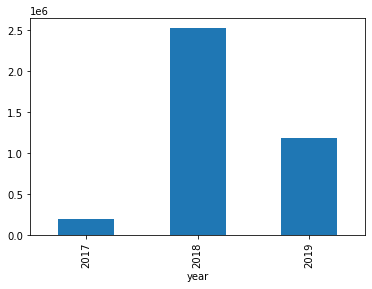

In [194]:
#visualise revenue per year
dfyear['price'].plot(kind='bar')

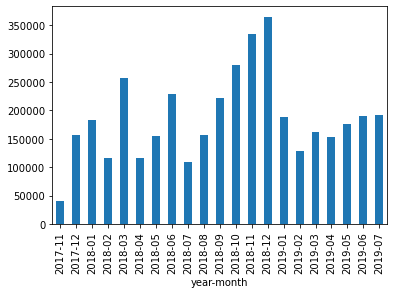

In [101]:
#visualise revenue per month
dfmonth['price'].plot(kind='bar')

In [203]:
#group by country and find top 10 highest revenue countries
dfcountry = df.groupby(by='country').sum()
dfcountry['price'] = dfcountry['price'].round(2)

#top 10 countries with the highest revenue:
top10 = dfcountry.sort_values(by='price', ascending=False)[:10]

In [63]:
#list full revenue totals
top10['price']

country
United Kingdom    3521513.51
EIRE               107069.21
Germany             49271.82
France              40565.14
Norway              38494.75
Spain               16040.99
Hong Kong           14452.57
Portugal            13528.67
Singapore           13175.92
Netherlands         12322.80
Name: price, dtype: float64

In [205]:
#save top 10 countries into a list
top10revenuecountries = top10.index.to_list()
top10revenuecountries

['United Kingdom',
 'EIRE',
 'Germany',
 'France',
 'Norway',
 'Spain',
 'Hong Kong',
 'Portugal',
 'Singapore',
 'Netherlands']

Text(0, 0.5, 'Total revenue')

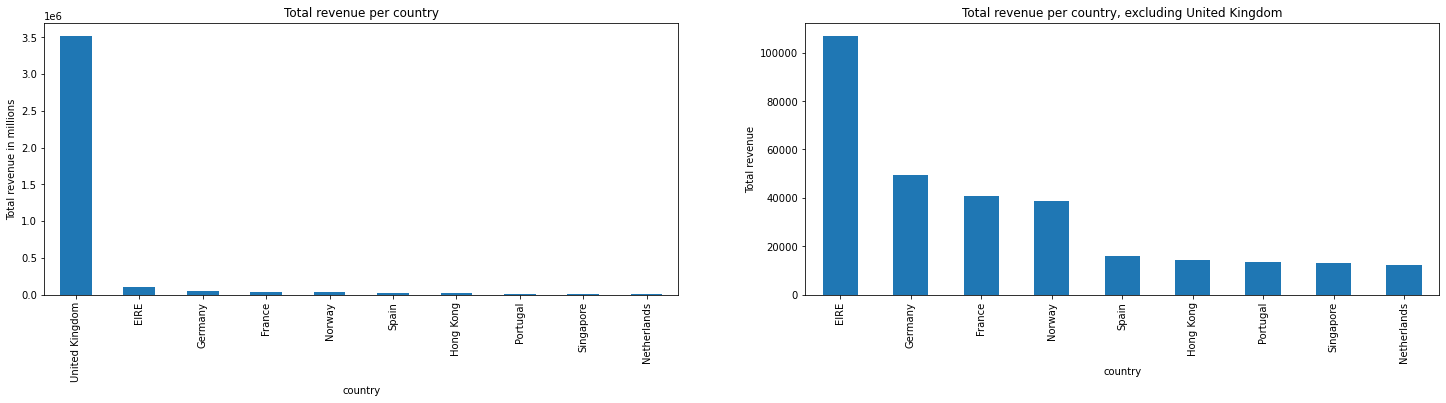

In [62]:
#plot revenue by country
fig, axs = plt.subplots(1,2, figsize=(25,5))

top10['price'].plot(kind='bar', ax=axs[0])
axs[0].set_title('Total revenue per country')
axs[0].yaxis.set_label_text('Total revenue in millions')

#excluding the UK
top10['price'][1:10].plot(kind='bar', ax=axs[1])
axs[1].set_title('Total revenue per country, excluding United Kingdom')
axs[1].yaxis.set_label_text('Total revenue')

In [246]:
#subset df as top 10 only
dftop10 = df[df['country'].isin(top10revenuecountries)]

#index on month and country
dfidxd = dftop10.groupby(by=['year-month', 'country']).sum()
dfidxd.index.values

array([('2017-11', 'Australia'), ('2017-11', 'Austria'),
       ('2017-11', 'Bahrain'), ('2017-11', 'Belgium'),
       ('2017-11', 'Bermuda'), ('2017-11', 'Brazil'),
       ('2017-11', 'Canada'), ('2017-11', 'Channel Islands'),
       ('2017-11', 'Cyprus'), ('2017-11', 'Czech Republic'),
       ('2017-11', 'Denmark'), ('2017-11', 'EIRE'),
       ('2017-11', 'European Community'), ('2017-11', 'Finland'),
       ('2017-11', 'France'), ('2017-11', 'Germany'),
       ('2017-11', 'Greece'), ('2017-11', 'Hong Kong'),
       ('2017-11', 'Iceland'), ('2017-11', 'Israel'),
       ('2017-11', 'Italy'), ('2017-11', 'Japan'), ('2017-11', 'Korea'),
       ('2017-11', 'Lebanon'), ('2017-11', 'Lithuania'),
       ('2017-11', 'Malta'), ('2017-11', 'Netherlands'),
       ('2017-11', 'Nigeria'), ('2017-11', 'Norway'),
       ('2017-11', 'Poland'), ('2017-11', 'Portugal'), ('2017-11', 'RSA'),
       ('2017-11', 'Saudi Arabia'), ('2017-11', 'Singapore'),
       ('2017-11', 'Spain'), ('2017-11', 'Sweden'),

In [241]:
#TIME SERIES - PRICE FOR EACH MONTH PER/COLOURED BY TOP 10 COUNTRY HERE
#FIND A WAY TO MAKE ROWS FOR NON TOP 10 COUNTRIES TO DISAPPEAR?